In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

**Task 1**

In [ ]:
# Importing data
wine_data = pd.read_csv('DS3_C2_S4_Regression_Practice_WhiteWine_Data.csv')
print(wine_data.shape)
wine_data.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Create a X and y
X = wine_data.drop(['alcohol'], axis=1)
y = wine_data['alcohol']

# Build a train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# X_train_normal.shape, X_train.shape
X_train.shape, y_train.shape

((3918, 11), (3918,))

**Task 2**

In [ ]:
# Building a model

tf.random.set_seed(42)

# Replicating the original model
wine_model = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(10),      #      adding second layer
                               tf.keras.layers.Dense(1)        #      adding third layer
])

# Compile a model
wine_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fitting a model
history = wine_model.fit(X_train,y_train, epochs=100)    # verbose = set verbose=0 for less output

Epoch 1/200
123/123 [==============================] - 1s 3ms/step - loss: 1.5683 - mae: 1.5683
Epoch 2/200
123/123 [==============================] - 0s 3ms/step - loss: 1.0589 - mae: 1.0589
Epoch 3/200
123/123 [==============================] - 0s 3ms/step - loss: 0.9374 - mae: 0.9374
Epoch 4/200
123/123 [==============================] - 0s 3ms/step - loss: 0.9421 - mae: 0.9421
Epoch 5/200
123/123 [==============================] - 0s 3ms/step - loss: 0.9972 - mae: 0.9972
Epoch 6/200
123/123 [==============================] - 0s 2ms/step - loss: 0.9152 - mae: 0.9152
Epoch 7/200
123/123 [==============================] - 0s 2ms/step - loss: 0.9549 - mae: 0.9549
Epoch 8/200
123/123 [==============================] - 0s 2ms/step - loss: 0.8788 - mae: 0.8788
Epoch 9/200
123/123 [==============================] - 0s 2ms/step - loss: 0.9392 - mae: 0.9392
Epoch 10/200
123/123 [==============================] - 0s 2ms/step - loss: 0.8623 - mae: 0.8623
Epoch 11/200
123/123 [=================

In [ ]:
# Evaluate a model 
wine_model.evaluate(X_test, y_test)

31/31 [==============================] - 1s 8ms/step - loss: 163.9202 - mae: 163.9202


[163.92022705078125, 163.92022705078125]

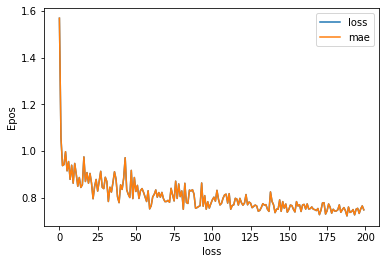

In [ ]:
# plot the history (also known as loss curve)
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

In [ ]:
# make and plot prediction for model_1
Y_pred_1 = wine_model.predict(X_test)
Y_pred_1

array([[10.807555 ],
       [12.669164 ],
       [12.353345 ],
       [10.279437 ],
       [11.853446 ],
       [10.642047 ],
       [ 9.022926 ],
       [10.081087 ],
       [11.493855 ],
       [ 9.32435  ],
       [11.532496 ],
       [10.989263 ],
       [11.159013 ],
       [11.222516 ],
       [ 8.304159 ],
       [ 9.45984  ],
       [11.94353  ],
       [ 9.988011 ],
       [11.253784 ],
       [10.796741 ],
       [10.132028 ],
       [11.876257 ],
       [ 9.866367 ],
       [ 9.591369 ],
       [11.751266 ],
       [10.112861 ],
       [ 9.823208 ],
       [11.038521 ],
       [10.504264 ],
       [10.232692 ],
       [ 9.191379 ],
       [ 9.381065 ],
       [ 9.320497 ],
       [10.686785 ],
       [ 9.477508 ],
       [11.86933  ],
       [12.19178  ],
       [10.069499 ],
       [ 9.703791 ],
       [11.0708885],
       [ 9.7404175],
       [ 9.858164 ],
       [11.783427 ],
       [11.550629 ],
       [ 9.467846 ],
       [ 9.710779 ],
       [10.139205 ],
       [ 9.39

In [ ]:
X_train.shape, y_train.shape

((3918, 11), (3918,))

**Task 3**

In [ ]:
# Calculate the mean_absoulete _error 
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                    y_pred = Y_pred_1.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.72399354>

In [ ]:
# Calculate the mean_squared_error 
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = Y_pred_1.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.8336301>

**Building the model with other loss function**

**Building a model - mae**

In [ ]:
tf.random.set_seed(42)

# Replicating the original model
model_mae = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_mae.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fitting a model
history_mae = model_mae.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_mae_loss, model_mae_mae = model_mae.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - mae: 0.8036


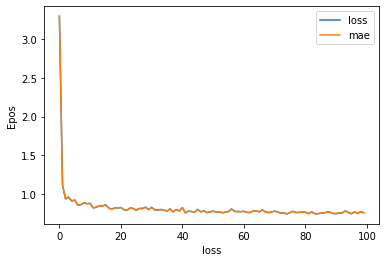

In [ ]:
# plot the history (also known as loss curve)
pd.DataFrame(history_mae.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

**Building a model - msle**

In [ ]:
tf.random.set_seed(42)

# Replicating the original model
model_msle = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_msle.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['msle'])

# Fitting a model
history_msle = model_msle.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_msle_loss, model_msle_mae = model_msle.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - msle: 0.0079


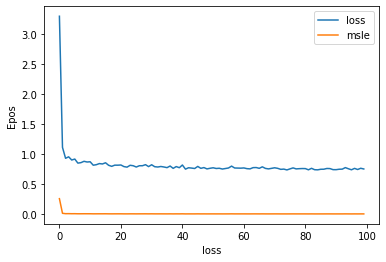

In [ ]:
# plot the history (also known as loss curve)
pd.DataFrame(history_msle.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

**Building a model - mse**

In [ ]:
tf.random.set_seed(42)

# Replicating the original model
model_mse = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),      #  adding one layer
                               tf.keras.layers.Dense(60),      #      adding second layer
                               tf.keras.layers.Dense(30)        #      adding third layer
])

# Compile a model
model_mse.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mse'])

# Fitting a model
history_mse = model_mse.fit(X_train,y_train, epochs=100, verbose=0)    # verbose = set verbose=0 for less output

# Evaluate the model
model_mse_loss, model_mse_mae = model_mse.evaluate(X_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.8036 - mse: 1.0421


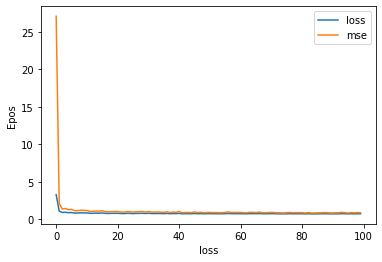

In [ ]:
# plot the history (also known as loss curve)
pd.DataFrame(history_mse.history).plot()
plt.xlabel('loss')
plt.ylabel('Epos')
plt.show()

In [ ]:
# Comparing the model

model_result = [['Model_MAE',model_mae_loss,model_mae_mae],
                ['Model_MSLE',model_msle_loss, model_msle_mae],
                ['Model_MSE',model_mse_loss, model_mse_mae]]

In [ ]:
final_result = pd.DataFrame(model_result, columns=['Model','Losses','MAE'])
final_result

,Model,Losses,MAE
0,Model_MAE,0.803588,0.803588
1,Model_MSLE,0.803588,0.007940
2,Model_MSE,0.803588,1.042120
